In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: February 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def closed_form_solution(X, y):
    w = np.linalg.pinv(X.T @ X) @ X.T @ y
    return w

In [4]:
def generate_data(n=100):
    # Generate synthetic data with two features and a linearly correlated label
    np.random.seed(42)  

    x1 = 2 * np.random.rand(n)
    x2 = 3 * np.random.rand(n)
    y = 5 + 1 * x1 + 2 * x2 + np.random.randn(n)
    X = np.c_[x1, x2]  # Concatenate the two features
    return X, y

X, y = generate_data()

In [6]:
# Add a column of ones to X for the intercept term
n = len(X)
X_b = np.c_[np.ones((n, 1)), X]

# Compute the optimal coefficients 
w = closed_form_solution(X_b, y)
print('Optimal coefficients:', np.round(w, 4))

Optimal coefficients: [4.9106 0.8291 2.2398]


Plotting the regression surface

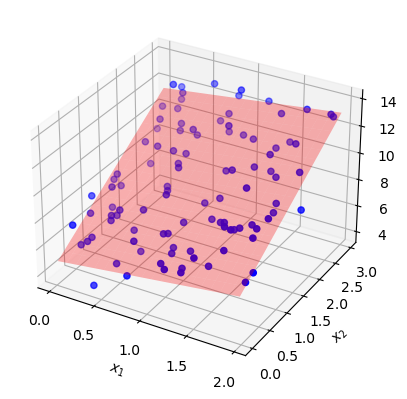

In [7]:
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Set up the figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
x1, x2 = X[:, 0], X[:, 1]
ax.scatter(x1, x2, y, color='blue')  

# Create a mesh grid for the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 20), 
                               np.linspace(x2.min(), x2.max(), 20))

# Calculate corresponding y values for the mesh grid
y_surf = w[0] + w[1] * x1_surf + w[2] * x2_surf

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='red', alpha=0.3)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')

plt.savefig('figures/multiple_linear_regression.pdf')

Using the LinearRegression class

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
print('Intercept:', np.round(model.intercept_, 4))
print('Coefficients:', np.round(model.coef_, 4))

Intercept: 4.9106
Coefficients: [0.8291 2.2398]
